In [1]:
import json
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 设置绘图参数
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "text.usetex" : True,
    "font.family" : "serif",
    "font.serif" : ["Computer Modern Serif"]
}
# 注意：需要有安装的 TeX 发行版，否则在使用matplotlib和seaborn时会报错！
# 如果没有 TeX 发行版，可以使用下面的设置
# custom_params = {
#     "axes.spines.right": False,
#     "axes.spines.top": False,
# }
sns.set_theme(style="ticks", rc=custom_params)

In [2]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))

Python 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0] on linux


# Preprocessing

In [3]:
df = pd.read_csv("./data/rumor_data.csv", index_col=0)

In [4]:
df.head()

,date,source,content,province,user_0,user_1,user_2,user_3,user_4,user_5,...,user_9,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,like
0,2022-02-18,北京日报客户端,有人从香港游泳偷渡到深圳湾被捕？假的！系轻生被救！,广东,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-02-18,大河报、羊城晚报,近日，社交媒体上一则题为“河南一位老爷爷考上清华大学被顶替”的消息引发网友关注和转发。消息...,河南,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,41
2,2022-02-17,南方都市报、大众网,近日，网传湖南衡阳“南岳衡山寺庙”高薪招聘住持，月薪高达5万元，弹性工作制，下班后原则上不...,湖南,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,26
3,2022-02-17,江苏省互联网举报中心,近日，网传消息称“苏州市独墅湖医院正在建方舱”。该消息发布后，引发关注讨论。 经核实，网传...,江苏,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
4,2022-02-16,中国新闻网,在塞企业组织包机载客回国？中国驻塞内加尔使馆辟谣！,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 365
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      366 non-null    object
 1   source    360 non-null    object
 2   content   366 non-null    object
 3   province  277 non-null    object
 4   user_0    366 non-null    int64 
 5   user_1    366 non-null    int64 
 6   user_2    366 non-null    int64 
 7   user_3    366 non-null    int64 
 8   user_4    366 non-null    int64 
 9   user_5    366 non-null    int64 
 10  user_6    366 non-null    int64 
 11  user_7    366 non-null    int64 
 12  user_8    366 non-null    int64 
 13  user_9    366 non-null    int64 
 14  user_10   366 non-null    int64 
 15  user_11   366 non-null    int64 
 16  user_12   366 non-null    int64 
 17  user_13   366 non-null    int64 
 18  user_14   366 non-null    int64 
 19  user_15   366 non-null    int64 
 20  user_16   366 non-null    int64 
 21  user_17   366 non-nul

In [6]:
df.describe()

,user_0,user_1,user_2,user_3,user_4,user_5,user_6,user_7,user_8,user_9,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,like
count,366.000000,366.000000,366.00000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.040984,0.188525,0.04918,0.030055,0.010929,0.038251,0.046448,0.120219,0.038251,0.038251,0.087432,0.095628,0.027322,0.024590,0.021858,0.095628,0.019126,0.021858,72.590164
std,0.198524,0.391666,0.21654,0.170971,0.104111,0.192065,0.210742,0.325662,0.192065,0.192065,0.282853,0.294484,0.163244,0.155084,0.146420,0.294484,0.137154,0.146420,159.193795
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2495.000000


In [7]:
from data_preprocess import get_preprocessed_data

df = get_preprocessed_data()

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.603 seconds.
Prefix dict has been built successfully.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 365
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           366 non-null    datetime64[ns]
 1   source         360 non-null    object        
 2   content        366 non-null    object        
 3   province       309 non-null    object        
 4   user_0         366 non-null    int64         
 5   user_1         366 non-null    int64         
 6   user_2         366 non-null    int64         
 7   user_3         366 non-null    int64         
 8   user_4         366 non-null    int64         
 9   user_5         366 non-null    int64         
 10  user_6         366 non-null    int64         
 11  user_7         366 non-null    int64         
 12  user_8         366 non-null    int64         
 13  user_9         366 non-null    int64         
 14  user_10        366 non-null    int64         
 15  user_11        366 non-null 

In [9]:
df.describe(percentiles=[0.5])

,date,user_0,user_1,user_2,user_3,user_4,user_5,user_6,user_7,user_8,...,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,like,log_like
count,366,366.000000,366.000000,366.00000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2021-12-20 22:01:58.032786944,0.040984,0.188525,0.04918,0.030055,0.010929,0.038251,0.046448,0.120219,0.038251,...,0.087432,0.095628,0.027322,0.024590,0.021858,0.095628,0.019126,0.021858,72.590164,3.675683
min,2021-11-07 00:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021-12-20 12:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,3.555348
max,2022-02-18 00:00:00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2495.000000,7.822445
std,NaN,0.198524,0.391666,0.21654,0.170971,0.104111,0.192065,0.210742,0.325662,0.192065,...,0.282853,0.294484,0.163244,0.155084,0.146420,0.294484,0.137154,0.146420,159.193795,1.080219


In [10]:
df.iloc[7]['content_token']

['网传', '横', '州市', '马', '山镇', '太宁', '村有', '阳性', '病例', '接触', '谣言']

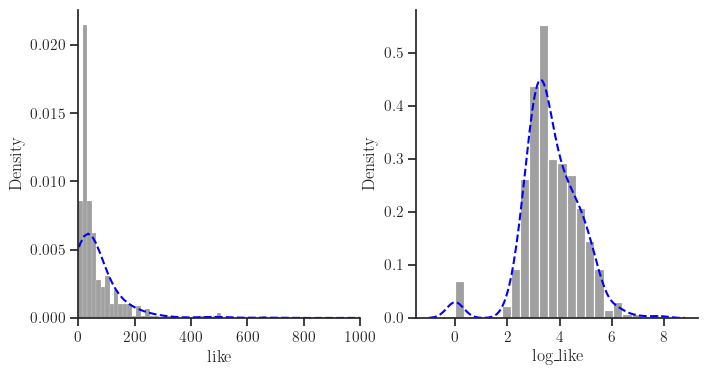

In [11]:
_, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(df['like'], ax=axes[0], color='grey', stat='density')
axes[0].set_xlim(0, 1000)  # 限制横坐标范围，防止尾部过长
sns.kdeplot(df['like'], ax=axes[0], color='blue', ls='--')
sns.histplot(df['log_like'], ax=axes[1],color='grey', stat='density')
sns.kdeplot(df['log_like'], ax=axes[1], color='blue', ls='--')
plt.savefig('./figures/loglike_like_hist.pdf', bbox_inches='tight')

# Data Visualization

## Rumor Number

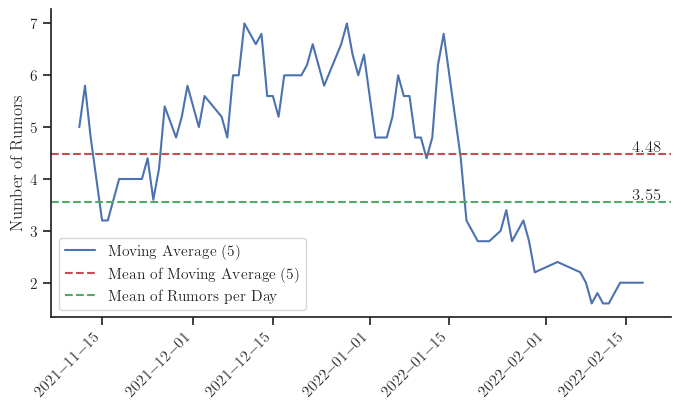

In [12]:
def rumor_num_moving_average(data: pd.DataFrame, window: int = 5) -> pd.Series:
    rumor_per_day = data.groupby('date').size()
    rumor_per_day_ma = rumor_per_day.rolling(window=window).mean()
    return rumor_per_day_ma

ma5 = rumor_num_moving_average(df, window=5)
_, ax = plt.subplots(figsize=(8, 4))
ax.plot(ma5, label='Moving Average (5)')
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Number of Rumors')
ax.axhline(
    y=ma5.mean(),
    color='r', linestyle='--', label='Mean of Moving Average (5)'
)
ax.text(
    df['date'].max() - pd.Timedelta(2, unit='D'),
    ma5.mean() + 0.05,
    '{:.2f}'.format(ma5.mean())
)
ax.axhline(
    y=df.shape[0] / (df['date'].max() - df['date'].min()).days,
    color='g', linestyle='--', label='Mean of Rumors per Day'
)
ax.text(
    df['date'].max() - pd.Timedelta(2, unit='D'),
    df.shape[0] / (df['date'].max() - df['date'].min()).days + 0.05,
    '{:.2f}'.format(df.shape[0] / (df['date'].max() - df['date'].min()).days)
)
ax.legend()

plt.savefig('./figures/rumor_num_ma5.pdf', bbox_inches='tight')

In [13]:
state_geo = json.load(open('./data/china.json', encoding='utf-8'))
total_provinces = [state_geo['features'][i]['properties']['name'] for i in range(len(state_geo['features']))]

def get_province_rumor(data: pd.DataFrame) -> pd.DataFrame:
    province_rumor = data.groupby('province').size()
    for i in total_provinces:
        if i not in province_rumor.index:
            province_rumor[i] = 0
    province_rumor_data = pd.DataFrame({'province': province_rumor.index, 'rumor_num': province_rumor.values})
    province_rumor_data['type'] = province_rumor_data['rumor_num'].apply(lambda x: 'high' if x > 20 else 'low')
    province_rumor_data['rumor_num_for_size'] = province_rumor_data['rumor_num'].apply(lambda x: x + 1)
    province_rumor_data['rumor_num_for_color'] = province_rumor_data['rumor_num_for_size'].apply(lambda x: np.log(x))
    return province_rumor_data

province_rumor_data = get_province_rumor(df)

In [14]:
def draw_choropleth(data: pd.DataFrame, name: str, title: str, flag: bool = True):
    pio.kaleido.scope.mathjax = None
    fig = px.choropleth(data, geojson=state_geo,
                        locations='province', featureidkey="properties.name",
                        color_discrete_sequence=["rgba(102, 204, 255, 20)"],
    )
    fig.update_traces(showlegend=False)
    fig2 = px.scatter_geo(data, geojson=state_geo,
                          locations='province', featureidkey="properties.name",
                          size='rumor_num_for_size',
                          color='rumor_num_for_size',
    )
    fig.add_trace(fig2.data[0])
    for i, frame in enumerate(fig.frames):
        fig.frames[i].data += (fig2.frames[i].data[0],)
    fig.update_geos(fitbounds="locations", visible=False, projection_type="natural earth")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, paper_bgcolor='rgb(255, 255, 255)', plot_bgcolor='rgb(255, 255, 255)',
                      geo=dict(bgcolor='rgb(255, 255, 255)'), font = dict(color = '#000000', family="Serif"))
    fig.layout.coloraxis.colorbar.title = title
    fig.layout.coloraxis.colorbar.len = 0.8
    fig.layout.coloraxis.showscale = flag
    fig.write_image(f'./figures/{name}.pdf')

In [15]:
# 使用plotly代替pyecharts画地理相关的图
import plotly.express as px
import plotly.io as pio

draw_choropleth(province_rumor_data, 'rumor_num_choropleth', 'Rumor numbers', flag=True)

In [16]:
def cut_time(data: pd.DataFrame) -> pd.DataFrame:
    data = data.copy()
    data_time_cut = [
    data[data['date'] < pd.Timestamp(2021, 12, 8)],
    data[(data['date'] >= pd.Timestamp(2021, 12, 8)) & (data['date'] < pd.Timestamp(2022, 1, 8))],
    data[(data['date'] >= pd.Timestamp(2022, 1, 8)) & (data['date'] < pd.Timestamp(2022, 2, 19))],
]
    return data_time_cut

In [17]:
df_time_cut = cut_time(df)

for i, data in enumerate(df_time_cut):
    province_rumor_tc = get_province_rumor(data)
    draw_choropleth(province_rumor_tc, f'rumor_num_choropleth_{i}', 'Rumor numbers', flag=False)

## Text

In [18]:
from collections import Counter
from wordcloud import WordCloud
import jieba.analyse
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [19]:
df["topics"] = df["content"].apply(lambda x: jieba.analyse.extract_tags(x, topK=3))

In [20]:
c = Counter(df['content_token'].sum())

In [21]:
c2 = Counter(df['topics'].sum())

In [22]:
wordcloud = WordCloud(
    font_path='/mnt/c/Windows/Fonts/simhei.ttf',
    mask=np.array(Image.open("./data/ChinaMap.png")),
    background_color='white',
    max_words=200,
    max_font_size=200,
    random_state=42
).generate_from_frequencies(c)

/home/jyk/.virtualenvs/dataVisualizationFinalProject/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [23]:
wordcloud.to_image()
wordcloud.to_file('./figures/wordcloud_tokens.png')

In [24]:
wordcloud2 = WordCloud(
    font_path='/mnt/c/Windows/Fonts/simhei.ttf',
    mask=np.array(Image.open("./data/ChinaMap.png")),
    background_color='white',
    max_words=200,
    max_font_size=200,
    random_state=42
).generate_from_frequencies(c2)

/home/jyk/.virtualenvs/dataVisualizationFinalProject/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [25]:
wordcloud2.to_image()
wordcloud2.to_file('./figures/wordcloud_topics.png')

In [26]:
words_list=[]
for lines in df['content_token']:
    words_list.append(lines)

dictionary = corpora.Dictionary(words_list)
corpus = [dictionary.doc2bow(words) for words in words_list]

lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=np.random.RandomState(42))

vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(vis_data, './figures/lda.html')
pyLDAvis.display(vis_data)

## Users

In [27]:
import networkx as nx
import community

In [28]:
user_data = df[[f'user_{i}' for i in range(18)]]

In [29]:
user_same_content = user_data[(user_data.sum(axis=1) > 1)]
edges = []
for row in user_same_content.iterrows():
    for i in range(18):
        if row[1][i] == 1:
            for j in range(i + 1, 18):
                if row[1][j] == 1:
                    edges.append((i, j))

In [30]:
G = nx.Graph()
G.add_nodes_from([i for i in range(18)])
G.add_edges_from(edges)

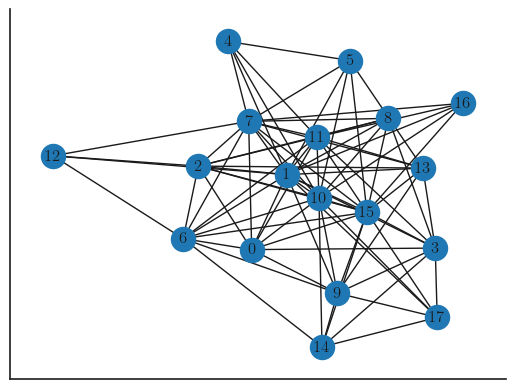

In [31]:
nx.draw_networkx(G)

In [32]:
partition = community.best_partition(G)
pos = nx.spring_layout(G)

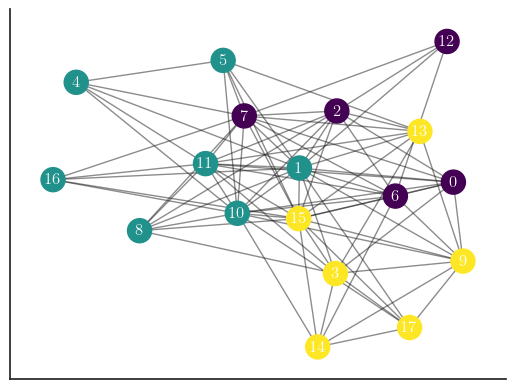

In [33]:
nx.draw_networkx_nodes(G, pos, cmap=plt.cm.viridis, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_color='white')
plt.savefig('./figures/user_network.pdf')

In [34]:
community1 = [0, 2, 6, 7, 8, 11, 12]
community2 = [1, 4, 5, 10, 16]
community3 = [3, 9, 13, 14, 15, 17]

user1 = user_data.iloc[:, community1]
user2 = user_data.iloc[:, community2]
user3 = user_data.iloc[:, community3]

In [35]:
def draw_user_word_cloud(user: pd.DataFrame, i: int):
    user_view = user[user.sum(axis=1) > 0]
    c = Counter(df.iloc[user_view.index, ]['topics'].sum())
    wordcloud = WordCloud(
        font_path='/mnt/c/Windows/Fonts/simhei.ttf',
        mask=np.array(Image.open("./data/ChinaMap.png")),
        background_color='white',
        max_words=200,
        max_font_size=200,
        random_state=42
    ).generate_from_frequencies(c)
    wordcloud.to_image()
    wordcloud.to_file(f'./figures/wordcloud_user_{i}.png')

draw_user_word_cloud(user1, 1)
draw_user_word_cloud(user2, 2)
draw_user_word_cloud(user3, 3)

/home/jyk/.virtualenvs/dataVisualizationFinalProject/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/home/jyk/.virtualenvs/dataVisualizationFinalProject/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/home/jyk/.virtualenvs/dataVisualizationFinalProject/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



## Covid related

In [36]:
covid_words = [
    '新冠', '疫情', '病毒', '疫苗', '病例', '确诊', '核酸', '防控'
]

covid_data = df[df['content_token'].apply(lambda x: any([word in x for word in covid_words]))]
no_covid_data = df[df['content_token'].apply(lambda x: not any([word in x for word in covid_words]))]

In [37]:
covid_data.describe()

,date,user_0,user_1,user_2,user_3,user_4,user_5,user_6,user_7,user_8,...,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,like,log_like
count,166,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.000000,166.000000,166.000000,166.000000,166.0,166.000000,166.000000,166.000000,166.000000,166.000000
mean,2021-12-24 02:36:08.674698752,0.084337,0.415663,0.108434,0.030120,0.012048,0.042169,0.036145,0.265060,0.048193,...,0.168675,0.108434,0.024096,0.030120,0.0,0.084337,0.018072,0.018072,79.463855,3.945621
min,2021-11-07 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-12-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,26.250000,3.304929
50%,2021-12-23 12:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,50.000000,3.931633
75%,2022-01-12 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,97.000000,4.584967
max,2022-02-14 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1115.000000,7.017506
std,NaN,0.278734,0.494327,0.311868,0.171436,0.109431,0.201582,0.187215,0.442701,0.214821,...,0.375597,0.311868,0.153812,0.171436,0.0,0.278734,0.133616,0.133616,106.199335,0.937344


In [38]:
covid_data.shape[0] / df.shape[0]

0.453551912568306

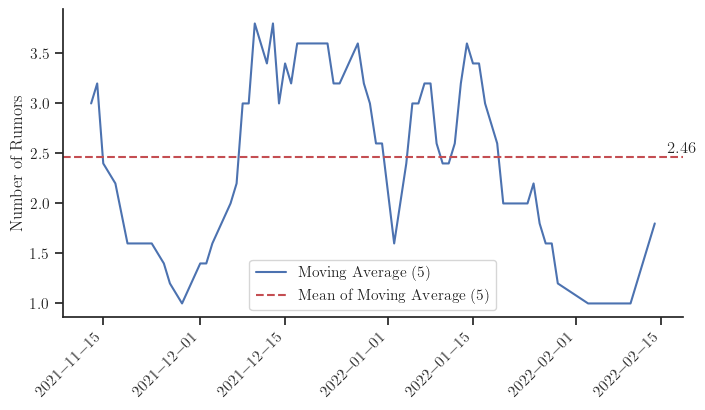

In [39]:
ma5_covid = rumor_num_moving_average(covid_data, 5)

_, ax = plt.subplots(figsize=(8, 4))
ax.plot(ma5_covid, label='Moving Average (5)')
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Number of Rumors')
ax.axhline(
    y=ma5_covid.mean(),
    color='r', linestyle='--', label='Mean of Moving Average (5)'
)
ax.text(
    df['date'].max() - pd.Timedelta(2, unit='D'),
    ma5_covid.mean() + 0.05,
    '{:.2f}'.format(ma5_covid.mean())
)
ax.legend()

plt.savefig('./figures/covid_rumor_num_ma5.pdf', bbox_inches='tight')
plt.show()

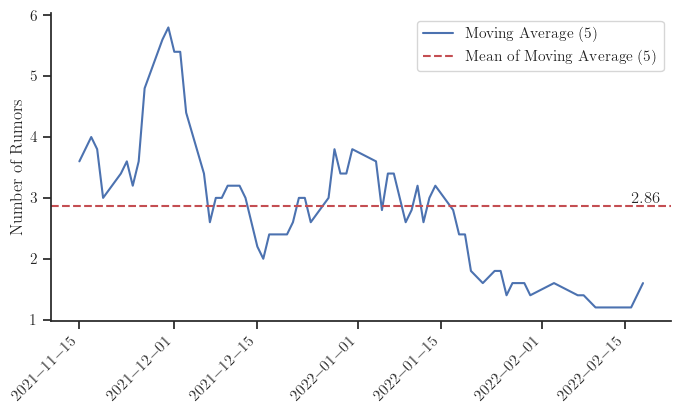

In [40]:
ma5_nocovid = rumor_num_moving_average(no_covid_data, 5)

_, ax = plt.subplots(figsize=(8, 4))
ax.plot(ma5_nocovid, label='Moving Average (5)')
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Number of Rumors')
ax.axhline(
    y=ma5_nocovid.mean(),
    color='r', linestyle='--', label='Mean of Moving Average (5)'
)
ax.text(
    df['date'].max() - pd.Timedelta(2, unit='D'),
    ma5_nocovid.mean() + 0.05,
    '{:.2f}'.format(ma5_nocovid.mean())
)
ax.legend()

plt.savefig('./figures/covid_no_rumor_num_ma5.pdf', bbox_inches='tight')
plt.show()

In [41]:
covid_province_rumor_data = get_province_rumor(covid_data)
covid_no_province_rumor_data = get_province_rumor(no_covid_data)

draw_choropleth(covid_province_rumor_data, 'covid_rumor_num_choropleth', 'Covid rumor numbers')
draw_choropleth(covid_no_province_rumor_data, 'covid_no_rumor_num_choropleth', 'Non Covid rumor numbers')

/home/jyk/.virtualenvs/dataVisualizationFinalProject/lib/python3.10/site-packages/kaleido/scopes/base.py:188: DeprecationWarning:

setDaemon() is deprecated, set the daemon attribute instead

/home/jyk/.virtualenvs/dataVisualizationFinalProject/lib/python3.10/site-packages/kaleido/scopes/base.py:188: DeprecationWarning:

setDaemon() is deprecated, set the daemon attribute instead



In [42]:
covid_time_cut = cut_time(covid_data)
covid_no_time_cut = cut_time(no_covid_data)

for i, data in enumerate(covid_time_cut):
    draw_choropleth(get_province_rumor(data), f'covid_rumor_num_choropleth_{i}', '', False)
for i, data in enumerate(covid_no_time_cut):
    draw_choropleth(get_province_rumor(data), f'covid_no_rumor_num_choropleth_{i}', '', False)

/home/jyk/.virtualenvs/dataVisualizationFinalProject/lib/python3.10/site-packages/kaleido/scopes/base.py:188: DeprecationWarning:

setDaemon() is deprecated, set the daemon attribute instead

/home/jyk/.virtualenvs/dataVisualizationFinalProject/lib/python3.10/site-packages/kaleido/scopes/base.py:188: DeprecationWarning:

setDaemon() is deprecated, set the daemon attribute instead

/home/jyk/.virtualenvs/dataVisualizationFinalProject/lib/python3.10/site-packages/kaleido/scopes/base.py:188: DeprecationWarning:

setDaemon() is deprecated, set the daemon attribute instead

/home/jyk/.virtualenvs/dataVisualizationFinalProject/lib/python3.10/site-packages/kaleido/scopes/base.py:188: DeprecationWarning:

setDaemon() is deprecated, set the daemon attribute instead

/home/jyk/.virtualenvs/dataVisualizationFinalProject/lib/python3.10/site-packages/kaleido/scopes/base.py:188: DeprecationWarning:

setDaemon() is deprecated, set the daemon attribute instead

/home/jyk/.virtualenvs/dataVisualization

In [43]:
c_covid = Counter(covid_data['topics'].sum())
wordcloud_covid = WordCloud(
    font_path='/mnt/c/Windows/Fonts/simhei.ttf',
    mask=np.array(Image.open("./data/ChinaMap.png")),
    background_color='white',
    max_words=200,
    max_font_size=200,
    random_state=42
).generate_from_frequencies(c_covid)

wordcloud_covid.to_image()
wordcloud_covid.to_file('./figures/wordcloud_covid.png')

/home/jyk/.virtualenvs/dataVisualizationFinalProject/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [44]:
c_nocovid = Counter(no_covid_data['topics'].sum())
wordcloud_nocovid = WordCloud(
    font_path='/mnt/c/Windows/Fonts/simhei.ttf',
    mask=np.array(Image.open("./data/ChinaMap.png")),
    background_color='white',
    max_words=200,
    max_font_size=200,
    random_state=42
).generate_from_frequencies(c_nocovid)

wordcloud_nocovid.to_image()
wordcloud_nocovid.to_file('./figures/wordcloud_nocovid.png')

/home/jyk/.virtualenvs/dataVisualizationFinalProject/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

